In [21]:
from cmdstanpy import CmdStanModel
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import pyreadr
import arviz as az


Our project focuses on modeling the spread of infection. It is based on so called SIR model of infection, which stands for Suspectible, Infected, Recovered. It is a compartment model, which means that is splits population into three compartments - S, I and R. When an infected individual comes into contact with suspectible, suspectible can become infected for certain amount of time, after which he moves to recovered compartment and becomes immune. Graphical summarization is presented below:

<img src="SIRFlow.png">

SIR model of infection is a viable tool to analyse the risk of potential pandemic outbreak, which can help with prevention.

Data comes from the R outbreaks package, it contains data about the outbreak of influenza H1N1 in a boarding school in england in 1978. Dataset consists of the total population of school and for each of 15 days, the number of currently sick and recovered students is provided.

The selected dataset is suitable for SIR analysis and didn't require any preprocessing

We specified two different models for predicting the infection:
One model is a classical SIR model, with the infection flow specified as in figure above.
The other model is simplified version of classical SIR model, for simplification we removed the I/N term, which made the infection chance independent on the percentage of sick people in population (chance of becoming infected depends only on beta parameter). The goal of simplification is to see how big of an impact the I/N has on the model accuracy

In [22]:
data = pd.read_csv('H1N1.csv')

In [23]:
in_bed = data['in_bed']
in_bed

0       3
1       8
2      26
3      76
4     225
5     298
6     258
7     233
8     189
9     128
10     68
11     29
12     14
13      4
Name: in_bed, dtype: int64

In [24]:
cases = in_bed
N = 763
n_days = len(cases)
t = range(1,15)
t0 = 0
i0 = 1
s0 = N-i0
r0 = 0
S = s0
I = i0
R = r0
y0 = (s0, i0 ,r0)
ts = t

In [25]:
cases
cases = [int(cases) for cases in cases]

# Prior

In [26]:
model1 = CmdStanModel(stan_file='simplified_ppc.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [27]:
model1 = CmdStanModel(stan_file='simplified_ppc.stan')
sim1 = model1.sample( data = {'n_days':n_days, 'y0':y0, 't0':t0, 'ts':ts, 'N':N}, 
                        iter_sampling = 1000,
                        iter_warmup= 0,
                        fixed_param= True,
                            chains = 4,
                            seed = 31052022,
                            )

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▊         | 00:00 Status


chain 1 |██▌       | 00:00 Iteration: 100 / 1000 [ 10%]  (Sampling)


chain 1 |████▏     | 00:00 Iteration: 300 / 1000 [ 30%]  (Sampling)


chain 1 |█████▊    | 00:00 Iteration: 500 / 1000 [ 50%]  (Sampling)





chain 1 |███████▌  | 00:01 Iteration: 700 / 1000 [ 70%]  (Sampling)
chain 1 |█████████▏| 00:01 Iteration: 900 / 1000 [ 90%]  (Sampling)

chain 1 |██████████| 00:01 Sampling completed                      
chain 2 |██████████| 00:01 Sampling completed

chain 3 |██████████| 00:01 Sampling completed
chain 4 |██████████| 00:01 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [28]:
sim1.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,0.00,NaN,0.00,0.0,0.000000e+00,0.00,NaN,NaN,NaN
beta,1.60,0.0210,1.20,0.0,1.700000e+00,3.50,3300.0,750.0,1.0
gamma,0.45,0.0071,0.42,0.0,3.900000e-01,1.20,3400.0,770.0,1.0
phi_inv,0.15,0.0031,0.19,0.0,8.600000e-02,0.54,3900.0,880.0,1.0
"y[1,1]",112.00,2.2000,136.00,0.0,6.700000e+01,402.00,3730.0,842.0,1.0
"y[1,2]",335.00,3.6000,219.00,0.0,3.840000e+02,639.00,3594.0,812.0,1.0
"y[1,3]",138.00,2.1000,124.00,0.0,1.210000e+02,362.00,3465.0,783.0,1.0
"y[2,1]",41.00,1.5000,95.00,0.0,5.900000e+00,212.00,3814.0,861.0,1.0
"y[2,2]",267.00,3.4000,209.00,0.0,2.560000e+02,644.00,3785.0,855.0,1.0


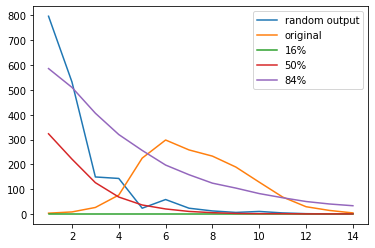

In [29]:
med_prob_ppc1 = np.percentile(sim1.stan_variable('cases'),[5,16,50,84,95],axis=0)
plt.plot(t,sim1.stan_variable('cases')[100])
plt.plot(t,in_bed)
plt.plot(t,med_prob_ppc1[1])
plt.plot(t,med_prob_ppc1[2])
plt.plot(t,med_prob_ppc1[3])
labels= ["random output", "original", "16%", "50%", "84%"]
plt.legend(labels)
plt.show()

In [30]:
model_fit1 = CmdStanModel(stan_file='simplified.stan')

INFO:cmdstanpy:compiling stan file /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/Project/simplified.stan to exe file /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/Project/simplified
INFO:cmdstanpy:compiled model executable: /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/Project/simplified
--- Translating Stan model to C++ code ---
bin/stanc  --o=/Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/Project/simplified.hpp /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/Project/simplified.stan
Warning in '/Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/Project/simplified.stan', line 2, column 2: Declaration
    of arrays by placing brackets after a type is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/Project/simplified.stan', line 2, column 21: Declaration
    of 

In [31]:
fit1=model_fit1.sample(data = {'n_days':n_days, 'y0':y0, 't0':t0, 'ts':ts, 'N':N,'cases':in_bed}, 
                            iter_sampling = 4000,
                            iter_warmup= 500,
                            chains = 4,
                            seed = 0,
                            )

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▏         | 00:00 Status

chain 1 |▍         | 00:01 Iteration:    1 / 4500 [  0%]  (Warmup)
































































































chain 1 |▋         | 00:52 Iteration:  100 / 4500 [  2%]  (Warmup)


chain 1 |█         | 00:54 Iteration:  300 / 4500 [  6%]  (Warmup)
chain 1 |█▎        | 00:55 Iteration:  400 / 4500 [  8%]  (Warmup)
chain 1 |█▋        | 00:56 Iteration:  501 / 4500 [ 11%]  (Sampling)
chain 1 |█▉        | 00:57 Iteration:  600 / 4500 [ 13%]  (Sampling)
chain 1 |██▎       | 00:58 Iteration:  800 / 4500 [ 17%]  (Sampling)
chain 1 |██▌       | 00:59 Iteration:  900 / 4500 [ 20%]  (Sampling)
chain 1 |██▊       | 01:00 Iteration: 1000 / 4500 [ 22%]  (Sampling)
chain 1 |███▏      | 01:02 Iteration: 1200 / 4500 [ 26%]  (Sampling)
chain 1 |███▍      | 01:03 Iteration: 1300 / 4500 [ 28%]  (Sampling)
chain 1 |███▌      | 01:04 Iteration: 1


INFO:cmdstanpy:CmdStan done processing.


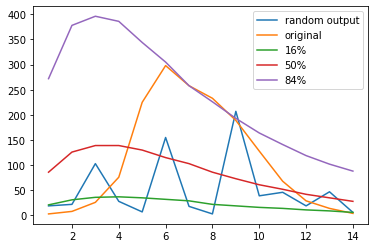

In [32]:
med_prob_ppc = np.percentile(fit1.stan_variable('pred_cases'),[5,16,50,84,95],axis=0)
plt.plot(t,fit1.stan_variable('pred_cases')[150])
plt.plot(t,in_bed)
plt.plot(t,med_prob_ppc[1])
plt.plot(t,med_prob_ppc[2])
plt.plot(t,med_prob_ppc[3])


labels= ["random output", "original", "16%", "50%", "84%"]
plt.legend(labels)

plt.show()

# second

In [33]:
model2 = CmdStanModel(stan_file='file1_ppc.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [34]:
sim2 = model2.sample( data = {'n_days':n_days, 'y0':y0, 't0':t0, 'ts':ts, 'N':N}, 
                        iter_sampling = 4000,
                        iter_warmup= 500,
                        fixed_param= True,
                            chains = 4,
                            seed = 0,
                            # output_dir='test'
                            )

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▏         | 00:00 Status




chain 1 |▍         | 00:00 Iteration:    1 / 4000 [  0%]  (Sampling)

chain 1 |▊         | 00:00 Iteration:  200 / 4000 [  5%]  (Sampling)








chain 1 |█▎        | 00:01 Iteration:  400 / 4000 [ 10%]  (Sampling)



































chain 1 |██▏       | 00:09 Iteration:  800 / 4000 [ 20%]  (Sampling)



chain 1 |██▎       | 00:10 Iteration:  900 / 4000 [ 22%]  (Sampling)

chain 1 |██▊       | 00:23 Iteration: 1100 / 4000 [ 27%]  (Sampling)





chain 1 |███▏      | 00:30 Iteration: 1300 / 4000 [ 32%]  (Sampling)







chain 1 |███▍      | 00:35 Iteration: 1400 / 4000 [ 35%]  (Sampling)





chain 1 |███▌      | 00:37 Iteration: 1500 / 4000 [ 37%]  (Sampling)

chain 1 |███▊      | 00:37 Iteration: 1600 / 4000 [ 40%]  (Sampling)

chain 1 |████      | 00:37 Iteration: 1700 / 4000 [ 42%]  (Sampling)

chain 1 |████▋     | 00:38 Iteration: 2000 / 4000 [ 50%]  (


INFO:cmdstanpy:CmdStan done processing.


In [35]:
sim2.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,0.00,NaN,0.00,0.0,0.000,0.00,NaN,NaN,NaN
beta,1.60,0.0093,1.20,0.0,1.700,3.50,16000.0,55.0,1.0
gamma,0.45,0.0034,0.41,0.0,0.390,1.20,15000.0,50.0,1.0
phi_inv,0.15,0.0015,0.19,0.0,0.088,0.55,16000.0,54.0,1.0
"y[1,1]",585.00,2.5000,315.00,0.0,755.000,761.00,16229.0,54.0,1.0
"y[1,2]",5.50,0.0670,8.60,0.0,2.800,20.00,16288.0,54.0,1.0
"y[1,3]",1.10,0.0100,1.30,0.0,0.840,3.40,16112.0,54.0,1.0
"y[2,1]",536.00,2.4000,306.00,0.0,716.000,761.00,16082.0,54.0,1.0
"y[2,2]",46.00,0.7100,91.00,0.0,8.000,237.00,16302.0,54.0,1.0


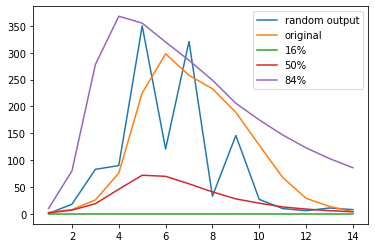

In [36]:
med_prob_ppc = np.percentile(sim2.stan_variable('cases'),[5,16,50,84,95],axis=0)
plt.plot(t,sim2.stan_variable('cases')[200])
plt.plot(t,in_bed)
plt.plot(t,med_prob_ppc[1])
plt.plot(t,med_prob_ppc[2])
plt.plot(t,med_prob_ppc[3])


labels= ["random output", "original", "16%", "50%", "84%"]
plt.legend(labels)

plt.show()


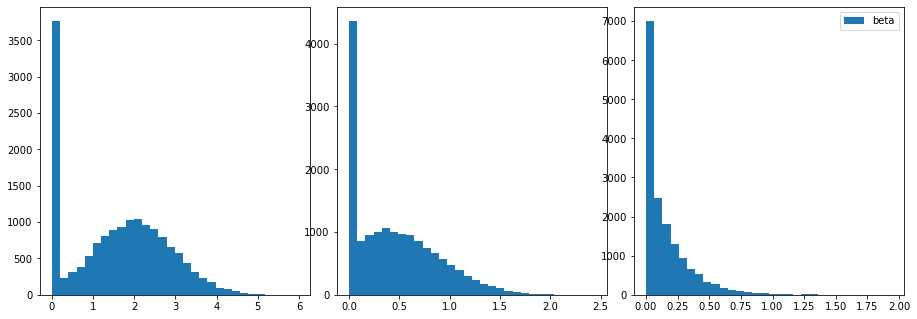

In [37]:
bin =30

fig,axs = plt.subplots(1,3,figsize=(15,5))
axs[0].hist(sim2.stan_variable('beta') ,bins = bin)
axs[1].hist(sim2.stan_variable('gamma'),bins = bin)
axs[2].hist(sim2.stan_variable('phi_inv'), bins = bin)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.1, hspace=0.1)
plt.legend(['beta', 'gamma' , 'phi_inv'])

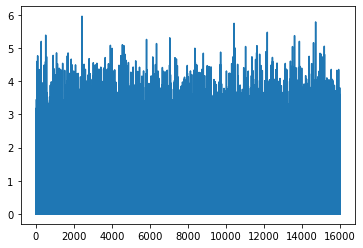

In [38]:
plt.plot(sim2.stan_variable('beta'))

In [39]:
model_fit2 = CmdStanModel(stan_file='file1.stan')

INFO:cmdstanpy:compiling stan file /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/Project/file1.stan to exe file /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/Project/file1
INFO:cmdstanpy:compiled model executable: /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/Project/file1
--- Translating Stan model to C++ code ---
bin/stanc  --o=/Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/Project/file1.hpp /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/Project/file1.stan
Warning in '/Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/Project/file1.stan', line 2, column 2: Declaration
    of arrays by placing brackets after a type is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/Project/file1.stan', line 2, column 21: Declaration
    of arrays by placing brackets after a 

In [40]:
fit2=model_fit2.sample(data = {'n_days':n_days, 'y0':y0, 't0':t0, 'ts':ts, 'N':N,'cases':in_bed}, 
                            iter_sampling = 4000,
                            iter_warmup= 500,
                            chains = 4,
                            seed = 0,
                            )

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status




In [ ]:
fit2.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-65.00,0.01800,1.300,-68.00,-65.00,-64.00,5600.0,43.0,1.0
gamma,0.54,0.00047,0.046,0.47,0.54,0.62,9600.0,73.0,1.0
beta,1.70,0.00054,0.053,1.70,1.70,1.80,9600.0,74.0,1.0
phi_inv,0.14,0.00083,0.076,0.05,0.12,0.28,8400.0,64.0,1.0
"y[1,1]",759.00,0.00210,0.210,758.00,759.00,759.00,10142.0,78.0,1.0
...,...,...,...,...,...,...,...,...,...
y_hat[10],1.70,0.00140,0.160,1.50,1.70,2.00,14412.0,111.0,1.0
y_hat[11],1.70,0.00140,0.170,1.50,1.70,2.00,14946.0,115.0,1.0
y_hat[12],1.70,0.00140,0.170,1.50,1.70,2.00,14286.0,110.0,1.0


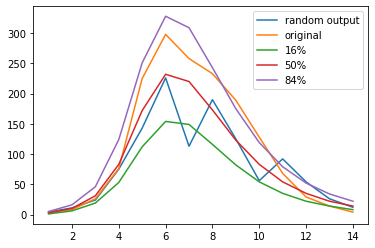

In [ ]:
med_prob_ppc = np.percentile(fit2.stan_variable('pred_cases'),[5,16,50,84,95],axis=0)
plt.plot(t,fit2.stan_variable('pred_cases')[150])
plt.plot(t,in_bed)
plt.plot(t,med_prob_ppc[1])
plt.plot(t,med_prob_ppc[2])
plt.plot(t,med_prob_ppc[3])


labels= ["random output", "original", "16%", "50%", "84%"]
plt.legend(labels)

plt.show()

/opt/anaconda3/lib/python3.9/site-packages/arviz/stats/stats.py:1458: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/arviz/stats/stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
/opt/anaconda3/lib/python3.9/site-packages/arviz/stats/stats.py:1458: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/arviz/stats/stats.py:248: FutureWarning: The frame.append method is deprecated and w

<AxesSubplot:xlabel='Log'>

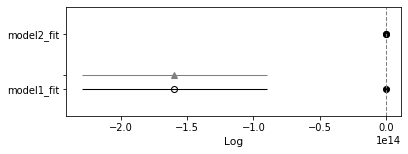

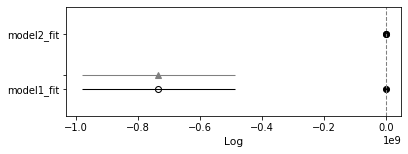

In [ ]:
results_1 = {'model1_fit': fit,'model2_fit': fit2}
comparisson_waic_1 = az.compare(results_1, ic = 'waic')
az.plot_compare(comparisson_waic_1)
comparisson_loo_1 = az.compare(results_1, ic = 'loo')
az.plot_compare(comparisson_loo_1)